In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='ISO-8859-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
data.columns = ['target', 'text']
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.isna().sum()

target    0
text      0
dtype: int64

In [6]:
data.duplicated().sum()

403

In [7]:
data[data.duplicated()]

,target,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [8]:
data.drop_duplicates(inplace=True)

data.duplicated().sum()

0

<Axes: >

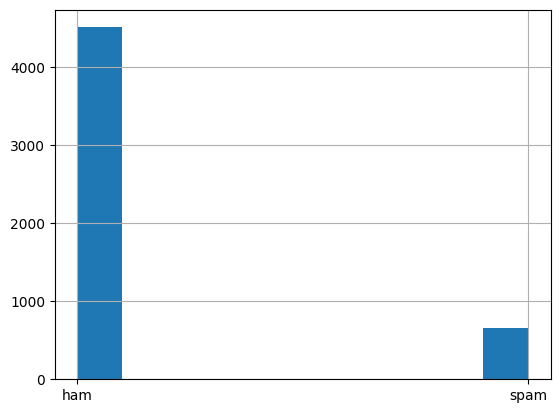

In [9]:
data['target'].hist()

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split

In [12]:
X, y = data['text'], data['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, shuffle=True, test_size=0.2)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [16]:
from nltk.corpus import stopwords

stops = list(set(stopwords.words('english')))
vectorizer = CountVectorizer(stop_words=stops)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vectorizer', vectorizer),
    ('nb', MultinomialNB())
])

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(stop_words=['shouldn', 'your', 'weren', 'll',
                                             'other', 'while', 'an', 'of', 'if',
                                             'does', 'ma', 'herself', 'have',
                                             'against', 'ours', 'it',
                                             'themselves', "you've", 'mightn',
                                             'but', 'himself', 'not', 'o',
                                             "you'd", 'my', 'having', 'once',
                                             "won't", 'hers', 'again', ...])),
                ('nb', MultinomialNB())])

In [19]:
pipe.score(X_test, y_test)

0.9835589941972921

In [20]:
from sklearn.metrics import confusion_matrix, roc_auc_score
y_pred = pipe.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred))


0.9852865342835163


In [21]:
from sklearn.metrics import classification_report
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.95      0.92      0.93       131

    accuracy                           0.98      1034
   macro avg       0.97      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [22]:
def predict_is_spam(text):
    pred = pipe.predict(text)
    print(pipe.predict_proba(text)[:, 1])
    if pred == 1:
        print(f'{text} IS A SPAM!!!')
    else:
        print(f'{text} IS A HAM')

In [23]:
predict_is_spam(['You have an access to a FReE course. Just click here and get your prizes now!'])

[0.95145227]
['You have an access to a FReE course. Just click here and get your prizes now!'] IS A SPAM!!!


In [24]:
predict_is_spam(['Hello colleagues, tommorow we have an urgent meeting. Don\'t forget to place a reminder'])

[0.0272801]
["Hello colleagues, tommorow we have an urgent meeting. Don't forget to place a reminder"] IS A HAM


In [25]:
predict_is_spam(['Guys You have limited access to free course available on my page right today. Dont forget to get your prize in this site!'])


[0.03937768]
['Guys You have limited access to free course available on my page right today. Dont forget to get your prize in this site!'] IS A HAM


In [26]:
import joblib
joblib.dump(pipe, 'spam_detector.pkl')

['spam_detector.pkl']